In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
import sys
sys.path.append("../")
from regression_markets.market.data import BatchData
from regression_markets.market.task import MaximumLikelihoodLinearRegression, BayesianLinearRegression


from regression_markets.market.policy import (
    KldCfModShapleyPolicy,
    KldContributionModShapleyPolicy,
    NllShapleyPolicy,
)
from regression_markets.market.mechanism import BatchMarket

In [66]:
mean = [0, 0, 0]
r = 0.99
cov = [
    [1, 0, 0], 
    [0, 1, r],
    [0, r, 1]]
N = 100
from tqdm import tqdm
noise_variance = 0.9
market_outputs = np.zeros((N, 3))
for i in tqdm(range(N)):

    X = np.random.multivariate_normal(mean, cov, size=100000)
    X = np.hstack((np.ones(len(X)).reshape(-1, 1), X))
    coeffs = np.array([0, 0.5, 0, 0.7])

    y = X @ coeffs + np.random.normal(0, noise_variance**0.4, size=len(X))

    x2_replicate = X[:, -1] + np.random.normal(0, 0.1, size=len(X))
    X_market = np.hstack((X, x2_replicate.reshape(-1, 1)))

    task = MaximumLikelihoodLinearRegression(
            noise_variance=noise_variance
        )

    market_data = BatchData(
            X_market[:, [0]], X_market[:, [1]], X_market[:, 2:], y.reshape(-1, 1)
    )
    market_output = BatchMarket(
        market_data, task, train_payment=1, observational=False
    ).run(NllShapleyPolicy)

    market_outputs[i] = market_output["train"]["payments"]

100%|██████████| 100/100 [00:17<00:00,  5.57it/s]


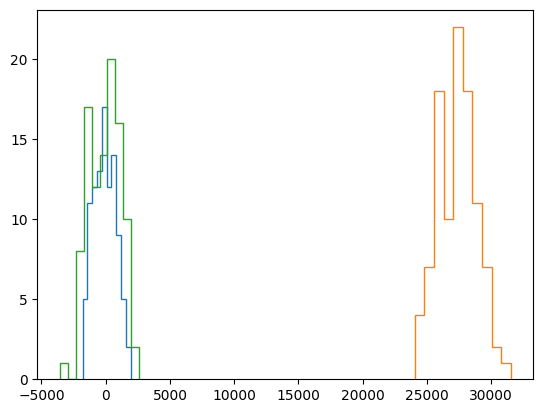

In [ ]:
import matplotlib.pyplot as plt

for j in range(3):
    plt.hist(market_outputs[:, j], histtype="step", label=f"x{j}")

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [14]:
origs = []
copys = []

origs2 = []
copys2 = []
from tqdm import tqdm
for i in tqdm(range(10000)):
    X_ = X.copy()
    x_copy = X[:, -1] + np.random.normal(0, 0.1, size=len(X))
    x_copy2 = X[:, -1] + np.random.normal(0, 0.1, size=len(X))
    X_ = np.hstack((X, x_copy.reshape(-1, 1))).copy()
    X_2 = np.hstack((X, x_copy2.reshape(-1, 1))).copy()
    X_2[:, -2] = x_copy


    lr = LinearRegression(fit_intercept=True)
    lr.fit(X_, y)
    lr.coef_
    orig = lr.coef_[-2]
    copy = lr.coef_[-1]
    origs.append(orig)
    copys.append(copy)

    lr = LinearRegression(fit_intercept=True)
    lr.fit(X_2, y)
    lr.coef_
    origs2.append(lr.coef_[-2])
    copys2.append(lr.coef_[-1])

100%|██████████| 10000/10000 [00:16<00:00, 595.59it/s]


67.51937391180415 0.07559876481471905


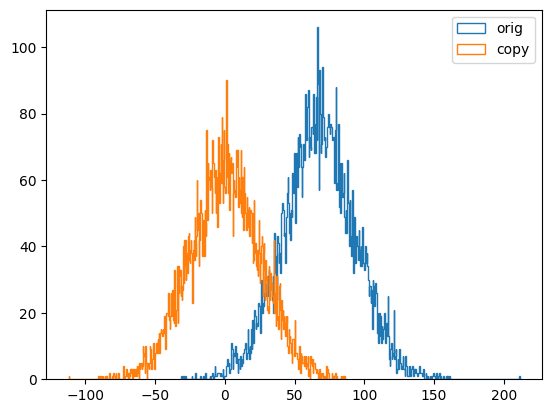

In [17]:
import matplotlib.pyplot as plt
plt.hist(origs, histtype="step", label="orig", bins=500)
plt.hist(copys, histtype="step", label="copy", bins=500)
plt.legend()
print(np.mean(origs), np.mean(copys))

8.162023628988889 7.949918403312927


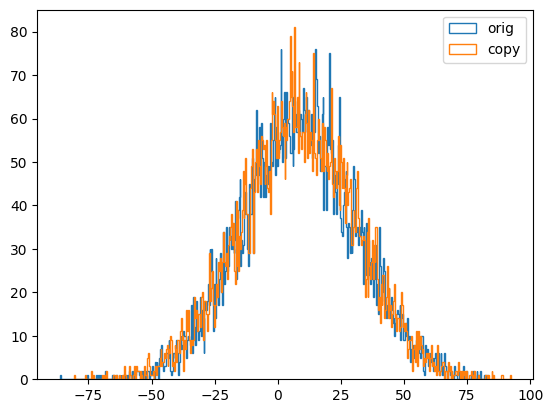

In [18]:
import matplotlib.pyplot as plt
plt.hist(origs2, histtype="step", label="orig", bins=500)
plt.hist(copys2, histtype="step", label="copy", bins=500)
plt.legend()
print(np.mean(origs2), np.mean(copys2))

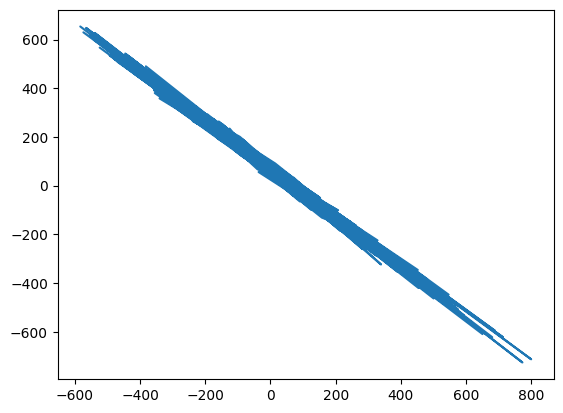

In [13]:
plt.plot(origs2, copys2)

In [ ]:
X = np.random.multivariate_normal(
    mean = np.zeros(2),
    cov = [[2, 0.7], [0.7, 3]],
    size=1000000)

y = X[:, 0] * 0.5 + X[:, 1] * 0.9

In [ ]:
(X.T @ X)/len(X)

array([[1.99426266, 0.69551574],
       [0.69551574, 3.00817528]])

In [ ]:
X_ = X.copy()
x_copy = X[:, -1] + np.random.normal(0, 1, size=len(X))
X_ = np.hstack((X, x_copy.reshape(-1, 1)))
(X_.T @ X_) / len(X)

array([[1.99426266, 0.69551574, 0.69616858],
       [0.69551574, 3.00817528, 3.00736555],
       [0.69616858, 3.00736555, 4.00518613]])

In [ ]:
(X.T @ y) / len(X)

array([1.62309549, 3.05511562])

In [ ]:
(X_.T @ y) / len(X)

array([1.62309549, 3.05511562, 3.05471329])

In [ ]:
((X.T @ X  ) @ np.array([0.5, 0.9]).reshape(-1, 1)) / len(X)

array([[1.62309549],
       [3.05511562]])

In [ ]:
cov_mat = (1 / len(X)) * X.T @ X
coeffs = np.array([0.5, 0.9]).reshape(-1, 1)
np.linalg.inv(cov_mat) @ cov_mat @ coeffs

array([[0.5],
       [0.9]])

In [ ]:
cov_mat = (1 / len(X)) * X_.T @ X_
coeffs = np.array([0.5, 0.9, 0]).reshape(-1, 1)
np.linalg.inv(cov_mat) @ cov_mat @ coeffs

array([[ 5.00000000e-01],
       [ 9.00000000e-01],
       [-5.55111512e-17]])

In [11]:
mean = [0, 0, 0]
N=10000
noise_variance =  0.3
q = np.random.normal(0, 1, size=N)
z0 = np.random.normal(0, 1, size=N)
x1 = z0 + np.random.normal(0, 0.3, size=N)
x2 = z0 + np.random.normal(0, 0.3, size=N)
x2_r1 = x2 + np.random.normal(0, 0.3, size=N)
x2_rK = x2 + np.random.normal(0, 0.3, size=N)
ones = np.ones(N).reshape(-1, 1)

y = 0.5 * q + 0.9 * z0 + np.random.normal(0, noise_variance**0.5, size=N)
task = MaximumLikelihoodLinearRegression(noise_variance=noise_variance)

market_features = np.vstack([
    x1,
    x2,
    x2_r1,
    x2 *x2_r1,
    x2 *x2_rK,
    x2_r1 *x2_rK,
    x2_rK
]).T

market_data = BatchData(ones, q.reshape(-1, 1), market_features, y.reshape(-1, 1), polynomial_degree=1)
market_output = BatchMarket(market_data, task, train_payment=1, observational=False
).run(NllShapleyPolicy)

market_output["train"]["contributions"]

array([ 6.40955754e-01,  7.03971062e-01, -1.87792901e-03,  7.87023370e-05,
       -1.13515501e-05,  4.81141995e-04, -1.60977256e-02])

In [6]:
market_data = BatchData(ones, q.reshape(-1, 1), market_features, y.reshape(-1, 1), polynomial_degree=2)
market_output = BatchMarket(market_data, task, train_payment=1, observational=True
).run(NllShapleyPolicy)

market_output["train"]["contributions"]

array([0.41658543, 0.44903008, 0.42303708, 0.369514  ])

In [38]:
noise_variance =  0.3
N=100000
q = np.random.normal(0, 1, size=N)
z0 = np.random.normal(0, 1, size=N)
x1 = z0 + np.random.normal(0, 0.3, size=N)**2
x2 = z0 + np.random.normal(0, 0.3, size=N) **2
x2_r1 = x2 + np.random.normal(0, 0.3, size=N)  **2
x2_rK = x2 + np.random.normal(0, 0.3, size=N)  **2
ones = np.ones(N).reshape(-1, 1)


y = 0.5 * q + 0.9 * z0 + np.random.normal(0, noise_variance**0.5, size=N)

# lr = LinearRegression(fit_intercept=False)
all = np.vstack([
    q,
    x1,
    x2,
    x2_r1,
    #x2_rK,
]).T

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(1, include_bias=False)
# X_poly = poly.fit_transform(all)
# lr.fit(X_poly, y)
# lr.coef_.round(2)

In [37]:
poly = PolynomialFeatures(2, include_bias=False)

market_data = BatchData(ones, q.reshape(-1, 1), poly.fit_transform(all[:, 1:]), y.reshape(-1, 1), polynomial_degree=1)
market_output = BatchMarket(market_data, task, train_payment=1, observational=False
).run(NllShapleyPolicy)

market_output["train"]["contributions"]

array([ 6.35616131e-01,  6.48110670e-01,  2.59493232e-03, -2.13249037e-05,
        3.71600284e-05,  3.79126015e-05,  6.46901758e-06,  1.09947486e-04,
       -9.15429714e-05])

In [41]:

market_data = BatchData(ones, q.reshape(-1, 1), all[:, 1:], y.reshape(-1, 1), polynomial_degree=2)
market_output = BatchMarket(market_data, task, train_payment=1, observational=False
).run(NllShapleyPolicy)

market_output["train"]["contributions"]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
marker.pol.num_agents

NameError: name 'policy' is not defined

In [43]:
m = BatchMarket(market_data, task, train_payment=1, observational=False)

In [47]:
policy = NllShapleyPolicy(
            active_agents=m.market_data.active_agents,
            baseline_agents=m.market_data.baseline_agents,
            polynomial_degree=m.market_data.degree,
            regression_task=m.regression_task,
            observational=m.observational,
        )

In [48]:
policy.num_agents

5

In [50]:
import math
math.binom(3, 4)

AttributeError: module 'math' has no attribute 'binom'

In [51]:
from regression_markets.common.utils import chain_combinations, safe_divide


In [64]:
agent_combinations = chain_combinations(
            np.arange(policy.num_agents), 1, policy.degree, replace=True
        )
agent_combinations

[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)]

In [60]:
len(agent_combinations)

20

In [55]:
policy.degree

2

In [63]:
poly = PolynomialFeatures(2, include_bias=False)
poly.fit_transform(all[:, 1:]).shape

(100000, 9)